# OpenCV Notes

## Import libs

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as patches

## Load and display image

### Gray image

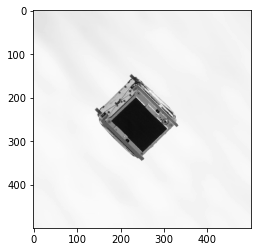

In [2]:
img_1_gray = cv.imread("input/test-img-1.jpg", cv.IMREAD_GRAYSCALE)

plt.imshow(img_1_gray, cmap="gray")

### RGB image

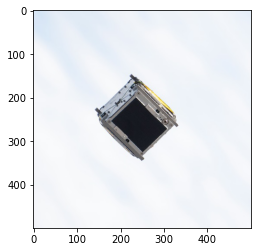

In [3]:
img_1_bgr = cv.imread("input/test-img-1.jpg", cv.IMREAD_COLOR)
img_1_rgb = cv.cvtColor(img_1_bgr, cv.COLOR_BGR2RGB)
plt.imshow(img_1_rgb)

## Save image

In [4]:
cv.imwrite("output/img_1_gray.jpg", img_1_gray)

True

## Resize image

In [5]:
img_1_rgb.shape

(500, 500, 3)

In [6]:
img_1_rgb_small = cv.resize(img_1_rgb, (48,48))
img_1_rgb_small.shape

(48, 48, 3)

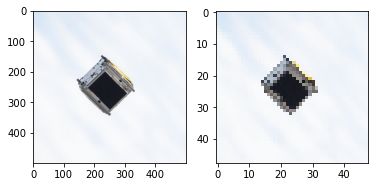

In [7]:
plt.subplot(1,2,1)
plt.imshow(img_1_rgb)
plt.subplot(1,2,2)
plt.imshow(img_1_rgb_small)

## Crop image

In [8]:
img_1_rgb_cropped = img_1_rgb[0:400,100:400,:]
img_1_rgb_cropped.shape

(400, 300, 3)

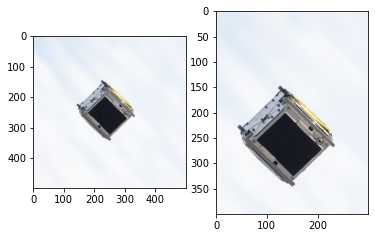

In [9]:
plt.subplot(1,2,1)
plt.imshow(img_1_rgb)
plt.subplot(1,2,2)
plt.imshow(img_1_rgb_cropped)

## Blur image

### Opencv blur method

In [10]:
img_1_blur = cv.blur(img_1_rgb, (10,10)) # kernel size 10x10

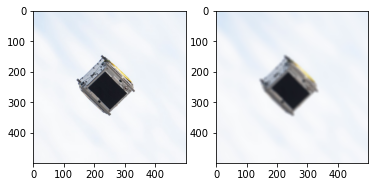

In [11]:
plt.subplot(1,2,1)
plt.imshow(img_1_rgb)
plt.subplot(1,2,2)
plt.imshow(img_1_blur)

### Manual kernel method

In [12]:
kernel_size = 5
kernel = np.ones((kernel_size,kernel_size)) / (kernel_size*kernel_size)
kernel

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

In [13]:
img_1_blur_kernel = cv.filter2D(img_1_rgb, -1, kernel)

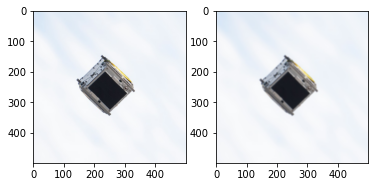

In [14]:
plt.subplot(1,2,1)
plt.imshow(img_1_rgb)
plt.subplot(1,2,2)
plt.imshow(img_1_blur_kernel)

## Sharp image

In [15]:
kernel_1 = np.array([[ 0,-1, 0],
                     [-1, 5,-1],
                     [ 0,-1, 0]])
kernel_2 = np.array([[-1,-1,-1],
                     [-1, 9,-1],
                     [-1,-1,-1]])

img_1_sharp_kernel_1 = cv.filter2D(img_1_blur, -1, kernel_1)
img_1_sharp_kernel_2 = cv.filter2D(img_1_blur, -1, kernel_2)

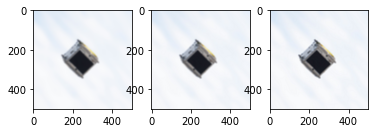

In [16]:
plt.subplot(1,3,1)
plt.imshow(img_1_blur)
plt.subplot(1,3,2)
plt.imshow(img_1_sharp_kernel_1)
plt.subplot(1,3,3)
plt.imshow(img_1_sharp_kernel_2)

## Contrast enhancement

### Gray image

In [17]:
img_1_gray_cont_enh = cv.equalizeHist(img_1_gray)

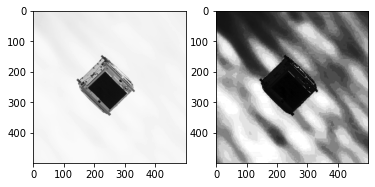

In [18]:
plt.subplot(1,2,1)
plt.imshow(img_1_gray, cmap="gray")
plt.subplot(1,2,2)
plt.imshow(img_1_gray_cont_enh, cmap="gray")

### Color image

In [19]:
img_1_yuv = cv.cvtColor(img_1_rgb, cv.COLOR_RGB2YUV)
img_1_yuv_cont_enh = img_1_yuv
img_1_yuv_cont_enh[:,:,0] = cv.equalizeHist(img_1_yuv[:,:,0])
img_1_rgb_cont_enh = cv.cvtColor(img_1_yuv_cont_enh, cv.COLOR_YUV2RGB)

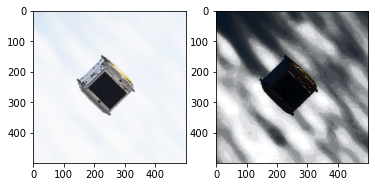

In [20]:
plt.subplot(1,2,1)
plt.imshow(img_1_rgb)
plt.subplot(1,2,2)
plt.imshow(img_1_rgb_cont_enh)

## Color izolation

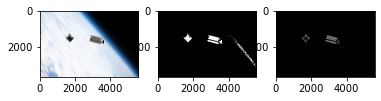

In [21]:
img_2_bgr = cv.imread("input/test-img-2.jpg", cv.IMREAD_COLOR)
img_2_rgb = cv.cvtColor(img_2_bgr, cv.COLOR_BGR2RGB)

img_2_hsv = cv.cvtColor(img_2_bgr, cv.COLOR_BGR2HSV)
lb = np.array([0,0,10])
ub = np.array([255,150,150])

mask = cv.inRange(img_2_hsv, lb, ub)

img_2_bgr_masked = cv.bitwise_and(img_2_bgr, img_2_bgr, mask=mask)
img_2_rgb_masked = cv.cvtColor(img_2_bgr_masked, cv.COLOR_BGR2RGB)

plt.subplot(1,3,1)
plt.imshow(img_2_rgb)
plt.subplot(1,3,2)
plt.imshow(mask, cmap='gray')
plt.subplot(1,3,3)
plt.imshow(img_2_rgb_masked)

## Thresholding

### Adaptive thresh gaussian

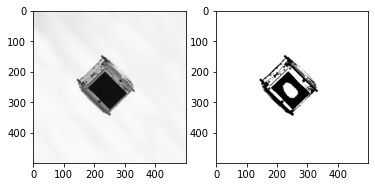

In [22]:
max_output_value = 255
neighborhood_size = 99
substract_from_mean = 10

img_binarized_gaus = cv.adaptiveThreshold(img_1_gray, 
                           max_output_value,
                           cv.ADAPTIVE_THRESH_GAUSSIAN_C,
                           cv.THRESH_BINARY,
                           neighborhood_size,
                           substract_from_mean)
plt.subplot(1,2,1)
plt.imshow(img_1_gray, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(img_binarized_gaus, cmap='gray')

### Adaptive thresh mean

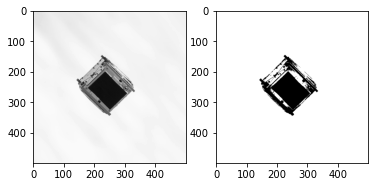

In [23]:
img_binarized_mean = cv.adaptiveThreshold(img_1_gray, 
                           max_output_value,
                           cv.ADAPTIVE_THRESH_MEAN_C,
                           cv.THRESH_BINARY,
                           neighborhood_size,
                           substract_from_mean)
plt.subplot(1,2,1)
plt.imshow(img_1_gray, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(img_binarized_mean, cmap='gray')

## Remove background

### GrabCut

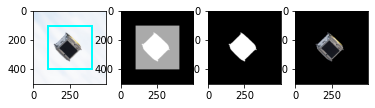

In [27]:
mask = np.zeros(img_1_rgb.shape[:2], np.uint8)

bgdModel = np.zeros((1,65), np.float64)
fgdModel = np.zeros((1,65), np.float64)
rect = (100,100,300,300)
cv.grabCut(img_1_rgb, mask, rect, bgdModel, fgdModel, 5, cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0), 0, 1).astype('uint8')
img_1_rgb_no_bkgr = img_1_rgb * mask2[:,:,np.newaxis]

plt.subplot(1,4,1)
plt.imshow(img_1_rgb)
ax = plt.gca()
rect = patches.Rectangle(rect[:2],
                 rect[2],
                 rect[3],
                 linewidth=2,
                 edgecolor='cyan',
                 fill = False)

ax.add_patch(rect)
plt.subplot(1,4,2)
plt.imshow(mask, cmap='gray')
plt.subplot(1,4,3)
plt.imshow(mask2, cmap='gray')
plt.subplot(1,4,4)
plt.imshow(img_1_rgb_no_bkgr)